# Lenet Architecture

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential 


In [ ]:
#Load the CIFAR dataset
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()


print(x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [ ]:
# Nomralizing the data
x_train = x_train/255
x_test = x_test/255


In [ ]:
# Convert labels to one-hot encoding
y_test = keras.utils.to_categorical(y_test, 10) # as we have 10 categories 
y_train = keras.utils.to_categorical(y_train, 10)


In [ ]:
# Building the Model Architecture
model = Sequential()

model.add(Conv2D(6, kernel_size = (5,5), padding = 'valid', activation='tanh', input_shape = (32,32,3)))
model.add(AveragePooling2D(pool_size= (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(16, kernel_size = (5,5), padding = 'valid', activation='tanh'))
model.add(AveragePooling2D(pool_size= (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test)

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.2976 - loss: 1.9382 - val_accuracy: 0.4032 - val_loss: 1.6879
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4195 - loss: 1.6507 - val_accuracy: 0.4471 - val_loss: 1.5516
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4680 - loss: 1.5035 - val_accuracy: 0.4749 - val_loss: 1.4623
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4992 - loss: 1.4132 - val_accuracy: 0.4981 - val_loss: 1.4045
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5232 - loss: 1.3437 - val_accuracy: 0.5152 - val_loss: 1.3532
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5398 - loss: 1.3055 - val_accuracy: 0.5315 - val_loss: 1.3209
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5530 - loss: 1.2565 - val_accuracy: 0.5294 - val_loss: 1.3164
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5656 - loss: 1.2258 - val_accu

# Alexnet model

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

In [ ]:
#function for downloading from URL 
# if you are using Kaggle, make sure to turn on internet connection and GPU
import os
import tarfile
import urllib
# this snippet of code is modified for our use case with additional comments, original source code:
# https://github.com/tflearn/tflearn/blob/master/tflearn/datasets/cifar10.py
def download(filename, source_url, work_directory):
    if not os.path.exists(work_directory): #check if the folder exists; if not make dir
        os.mkdir(work_directory)
    filepath = os.path.join(work_directory, filename)
    if not os.path.exists(filepath): # check if file exists; if not, download
        print("Downloading file, Please wait...")
        filepath, _ = urllib.request.urlretrieve(source_url + filename, # this is a function to download files
                                                 filepath)
        statinfo = os.stat(filepath)
        print(('Succesfully downloaded', filename, statinfo.st_size, 'bytes.'))
        untar(filepath,work_directory)
    return filepath

#only extract jpg files
def jpg_files(members):
    for tarinfo in members:
        if os.path.splitext(tarinfo.name)[1] == ".jpg":
            yield tarinfo

# extract function
def untar(fname,path="17category-flowers-py"): #untarring the archive
    tar = tarfile.open(fname)
    tar.extractall(path="17category-flowers-py", members=jpg_files(tar))
    tar.close()
    if path is "":
        print("File Extracted in Current Directory")
    else:
        print("File Extracted in to ",  path)

In [ ]:
#download("17flowers.tgz", "http://www.robots.ox.ac.uk/~vgg/data/flowers/17/","C:\\Users\\sredekar\\OneDrive - Interpublic\\Desktop\\Datascience\\Deep learning\\CNN\\Lenet\\Images")

('Succesfully downloaded', '17flowers.tgz', 60270631, 'bytes.')
File Extracted in to  C:\Users\sredekar\OneDrive - Interpublic\Desktop\Datascience\Deep learning\CNN\Lenet\Images


'C:\\Users\\sredekar\\OneDrive - Interpublic\\Desktop\\Datascience\\Deep learning\\CNN\\Lenet\\Images\\17flowers.tgz'

In [9]:
import os
os.listdir("C:\\Users\\sredekar\\OneDrive - Interpublic\\Desktop\\Datascience\\Deep learning\\CNN\\Lenet\\Images") #jpg folder should be available

['17flowers.tgz', 'jpg']

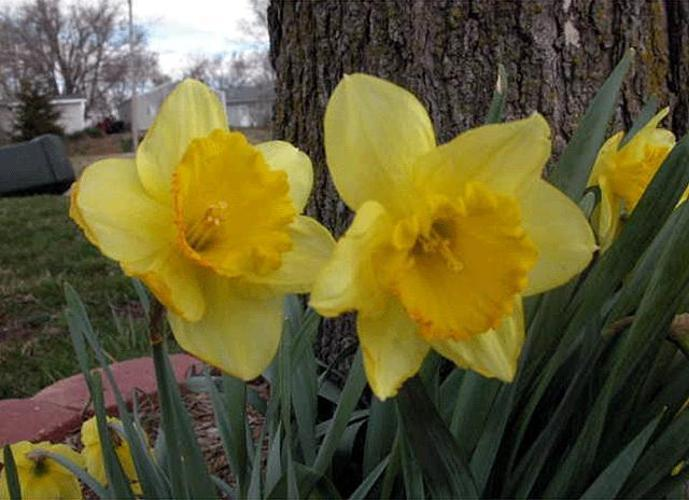

In [10]:
from PIL import Image #show one example of image
Image.open("C:\\Users\\sredekar\\OneDrive - Interpublic\\Desktop\\Datascience\\Deep learning\\CNN\\Lenet\\Images\\jpg\\image_0001.jpg")

In [11]:
#load images as np arrays
import numpy as np
def load_data(fpath):    
    img=Image.open(fpath).resize((224,224)) # resize to 224x224 for training purposes
    img = np.asarray(img, dtype='float32')
    return img

In [12]:
import os
#all images are loaded as np arrays
images=[]
labels=[]
total=1361
j=1
for i in range(1, total): 
    fname="C:\\Users\\sredekar\\OneDrive - Interpublic\\Desktop\\Datascience\\Deep learning\\CNN\\Lenet\\Images\\jpg\\image_"    
    fpath = os.path.join(fname + str(i).zfill(4) + ".jpg")
    images.append(load_data(fpath))
    labels.append(j) #labels are created as well
    if i%80==0: j+=1

In [13]:
images = np.asarray(images) # all of the images are converted to np array of (1360,224,224,3)
labels = np.asarray(labels).reshape(1360,1) # labels are also converted to (1360,1)
images.shape

(1360, 224, 224, 3)

c:\ProgramData\anaconda3\envs\text_summerizer\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


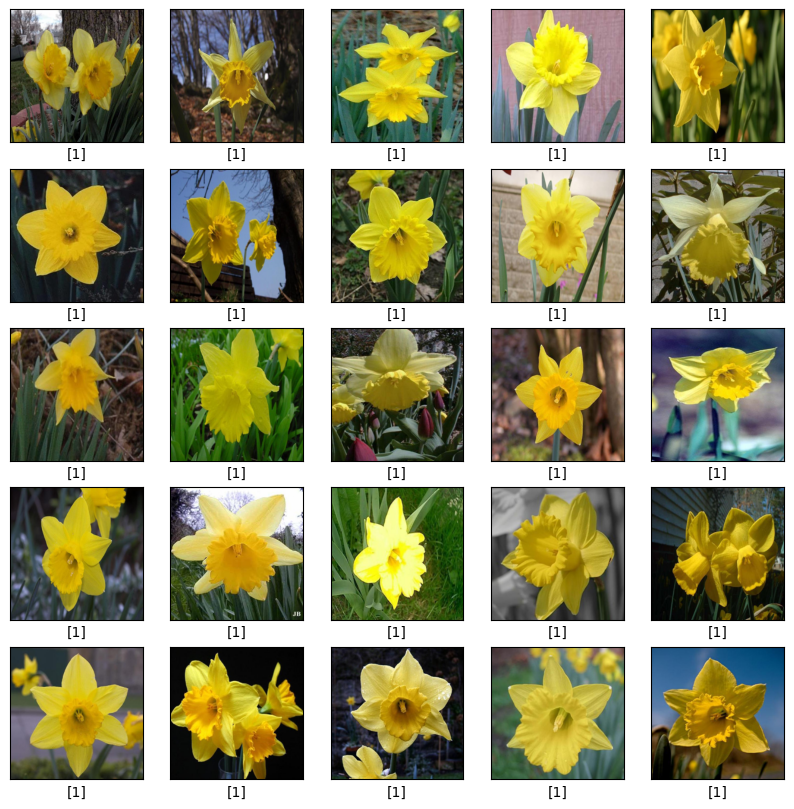

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10)) # plot 25 images
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i]/255, cmap=plt.cm.binary)
    plt.xlabel(labels[i])

In [17]:

# Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())



# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())


# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))


# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())


# Passing it to a dense layer
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 activation (Activation)     (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 26, 26, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 26, 26, 256)      

In [18]:
from keras.utils import to_categorical

x_train = images.astype('float32') / 255.0
labels_zero_indexed = labels - 1

y_train = to_categorical(labels_zero_indexed, num_classes=17)

In [19]:
print(x_train.shape)
print(y_train.shape)

(1360, 224, 224, 3)
(1360, 17)


In [20]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Train

model.fit(x_train, y_train, batch_size=64, epochs=5, verbose=1,validation_split=0.2, shuffle=True)

Epoch 1/5
17/17 [==============================] - 46s 2s/step - loss: 3.3857 - accuracy: 0.3143 - val_loss: 55.2601 - val_accuracy: 0.0000e+00
Epoch 2/5
17/17 [==============================] - 43s 3s/step - loss: 2.0501 - accuracy: 0.4853 - val_loss: 58.9241 - val_accuracy: 0.0000e+00
Epoch 3/5
17/17 [==============================] - 49s 3s/step - loss: 1.4719 - accuracy: 0.5450 - val_loss: 28.5377 - val_accuracy: 0.0000e+00
Epoch 4/5
17/17 [==============================] - 49s 3s/step - loss: 1.2608 - accuracy: 0.5910 - val_loss: 14.9819 - val_accuracy: 0.0221
Epoch 5/5
17/17 [==============================] - 50s 3s/step - loss: 1.1960 - accuracy: 0.6324 - val_loss: 15.3697 - val_accuracy: 0.0147


## VGG 16

    Here we are going to use the pretrained VGG model and transfer its learning to our Cat-Dog dataset  

In [37]:
# download the data from g drive

import gdown
url = "https://drive.google.com/file/d/12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP/view?usp=sharing"
file_id = url.split("/")[-2]
print(file_id)
prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id, "catdog.zip")

12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP


Downloading...
From: https://drive.google.com/uc?/export=download&id=12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP
To: c:\Users\sredekar\OneDrive - Interpublic\Desktop\Datascience\Deep learning\CNN\Lenet\catdog.zip
100%|██████████| 9.09M/9.09M [00:05<00:00, 1.60MB/s]


'catdog.zip'

In [3]:
from tensorflow import keras
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import scipy

# Set the path to your training and validation data
train_data_dir = 'C:\\Users\\sredekar\\OneDrive - Interpublic\\Desktop\\Datascience\\Deep learning\\CNN\\Lenet\\train'
validation_data_dir = 'C:\\Users\\sredekar\\OneDrive - Interpublic\\Desktop\\Datascience\\Deep learning\\CNN\\Lenet\\validation'

# Set the number of training and validation samples
num_train_samples = 2000
num_validation_samples = 800

# Set the number of epochs and batch size
epochs = 5
batch_size = 16

# Load the VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential()

# Add the base model as a layer
model.add(base_model)

# Add custom layers on top of the base model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Preprocess the training and validation data- This makes sure that input image size matches the size requried by the VGG model
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) 
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary')

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=None,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=None)

# Save the trained model
model.save('dog_cat_classifier.h5')


Found 337 images belonging to 2 classes.
Found 59 images belonging to 2 classes.
Epoch 1/5
22/22 [==============================] - 48s 2s/step - loss: 6.3229 - accuracy: 0.8754 - val_loss: 2.0941 - val_accuracy: 0.9661
Epoch 2/5
22/22 [==============================] - 61s 3s/step - loss: 1.9583 - accuracy: 0.9763 - val_loss: 3.6866 - val_accuracy: 0.9492
Epoch 3/5
22/22 [==============================] - 82s 4s/step - loss: 0.4472 - accuracy: 0.9911 - val_loss: 3.2336 - val_accuracy: 0.9322
Epoch 4/5
22/22 [==============================] - 77s 3s/step - loss: 0.4238 - accuracy: 0.9822 - val_loss: 2.8784 - val_accuracy: 0.9492
Epoch 5/5
22/22 [==============================] - 67s 3s/step - loss: 0.3276 - accuracy: 0.9911 - val_loss: 8.5608 - val_accuracy: 0.8644


c:\ProgramData\anaconda3\envs\text_summerizer\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
